# Explore here

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
df = pd.read_csv("../data/raw/River_Arno.csv")
df.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


In [3]:
df.shape

(8217, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8217 non-null   object 
 1   Rainfall_Le_Croci          6026 non-null   float64
 2   Rainfall_Cavallina         6026 non-null   float64
 3   Rainfall_S_Agata           6026 non-null   float64
 4   Rainfall_Mangona           6026 non-null   float64
 5   Rainfall_S_Piero           6026 non-null   float64
 6   Rainfall_Vernio            4283 non-null   float64
 7   Rainfall_Stia              1283 non-null   float64
 8   Rainfall_Consuma           1283 non-null   float64
 9   Rainfall_Incisa            4568 non-null   float64
 10  Rainfall_Montevarchi       1647 non-null   float64
 11  Rainfall_S_Savino          1283 non-null   float64
 12  Rainfall_Laterina          1283 non-null   float64
 13  Rainfall_Bibbiena          2378 non-null   float

In [5]:
df["Date"] = pd.to_datetime(df["Date"], format = '%d/%m/%Y')
df = df.set_index("Date")
df.sort_index(inplace=True)
df = df["Hydrometry_Nave_di_Rosano"]
df.head()

Date
1998-01-01    1.82
1998-01-02    1.94
1998-01-03    2.11
1998-01-04    1.84
1998-01-05    1.88
Name: Hydrometry_Nave_di_Rosano, dtype: float64

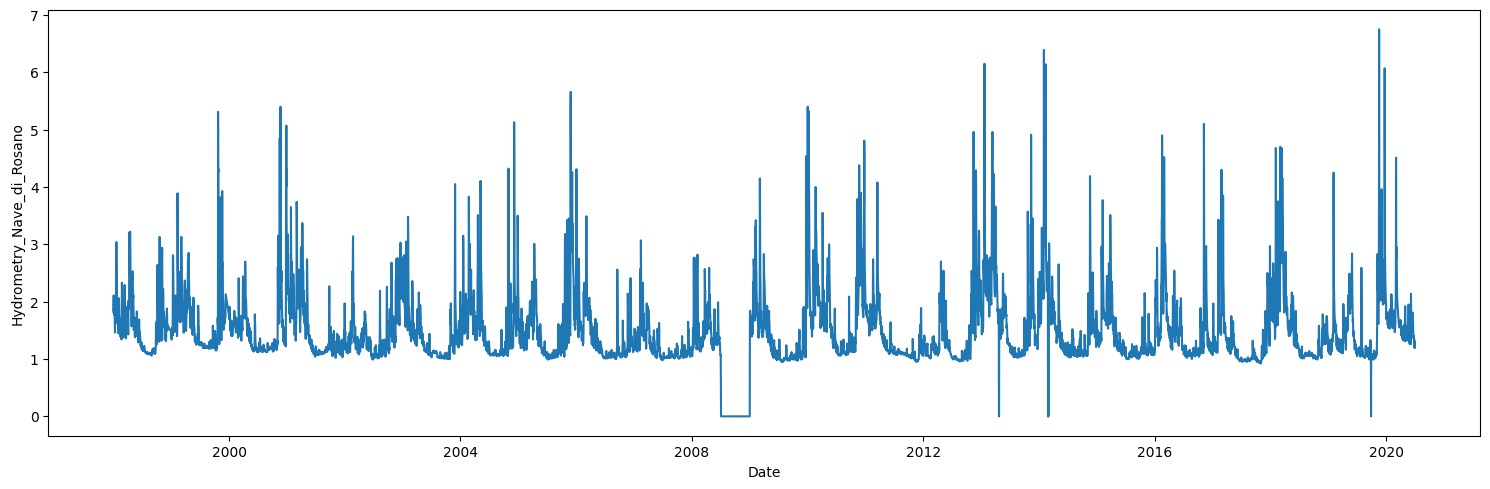

In [6]:
fig, axis = plt.subplots(figsize = (15, 5))
sns.lineplot(data = df)
plt.tight_layout()
plt.show()

In [7]:
df.describe()

count    8169.000000
mean        1.472407
std         0.616259
min         0.000000
25%         1.100000
50%         1.300000
75%         1.690000
max         6.750000
Name: Hydrometry_Nave_di_Rosano, dtype: float64

### Preprocesamiento de datos

In [8]:
#Cantidad de NaN
cantidad_nan = df.isna().sum()
nan_por_mes = df.isna().groupby(df.index.to_period('M')).sum()
nan_por_mes = nan_por_mes[nan_por_mes > 0]
print("Cantidad de NaN:")
print(cantidad_nan)
print("NaN por mes:")
print(nan_por_mes)

Cantidad de NaN:
48
NaN por mes:
Date
1998-12    21
1999-05     1
1999-12    20
2000-03     3
2007-11     1
2008-07     1
2020-05     1
Freq: M, Name: Hydrometry_Nave_di_Rosano, dtype: int64


In [9]:
# Interpolación de los valores NaN
df = df.interpolate(method="linear")
# Verificar si hay NaN después de la interpolación
print("Cantidad de NaN después de la interpolación:")
print(df.isna().sum())

Cantidad de NaN después de la interpolación:
0


In [10]:
# Verificamos que la serie temporal no tiene saltos
df_dias = df.index.to_series().diff().dt.days
print("Diferencia de días entre mediciones:")
print(df_dias.value_counts().sort_index())

Diferencia de días entre mediciones:
Date
1.0    8216
Name: count, dtype: int64


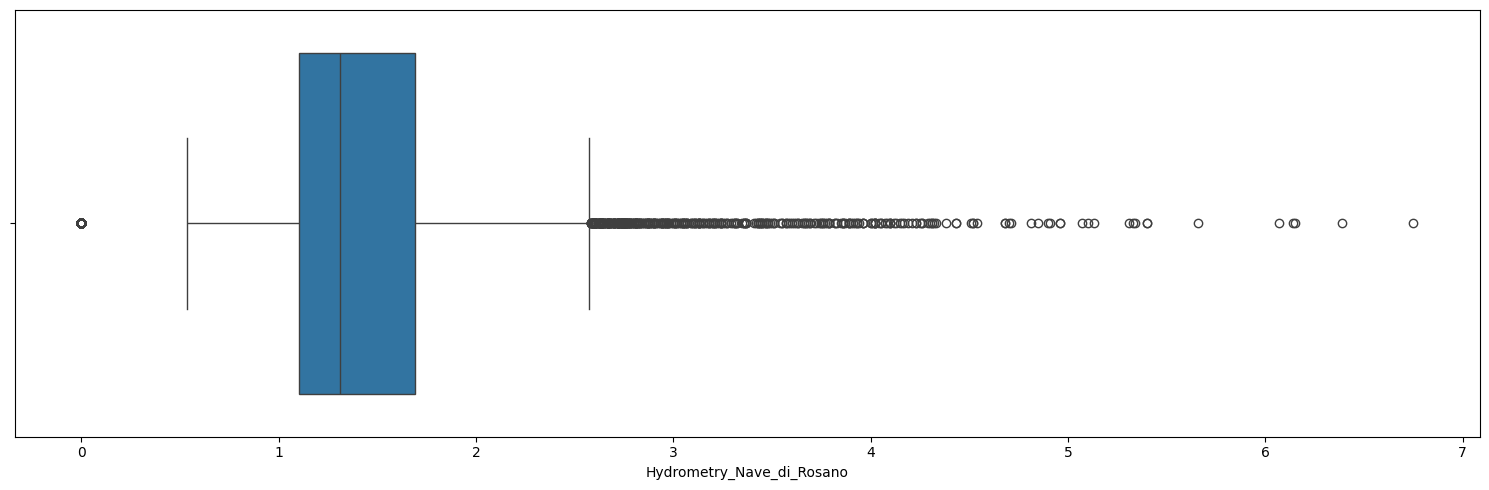

In [11]:
#Analisis de OUTLIERS
fig, axis = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df, orient='h')
plt.tight_layout()
plt.show()

In [12]:
df = df[df >= 0.6]

In [13]:
df = df.resample("D").mean()
df = df.interpolate(method='linear')

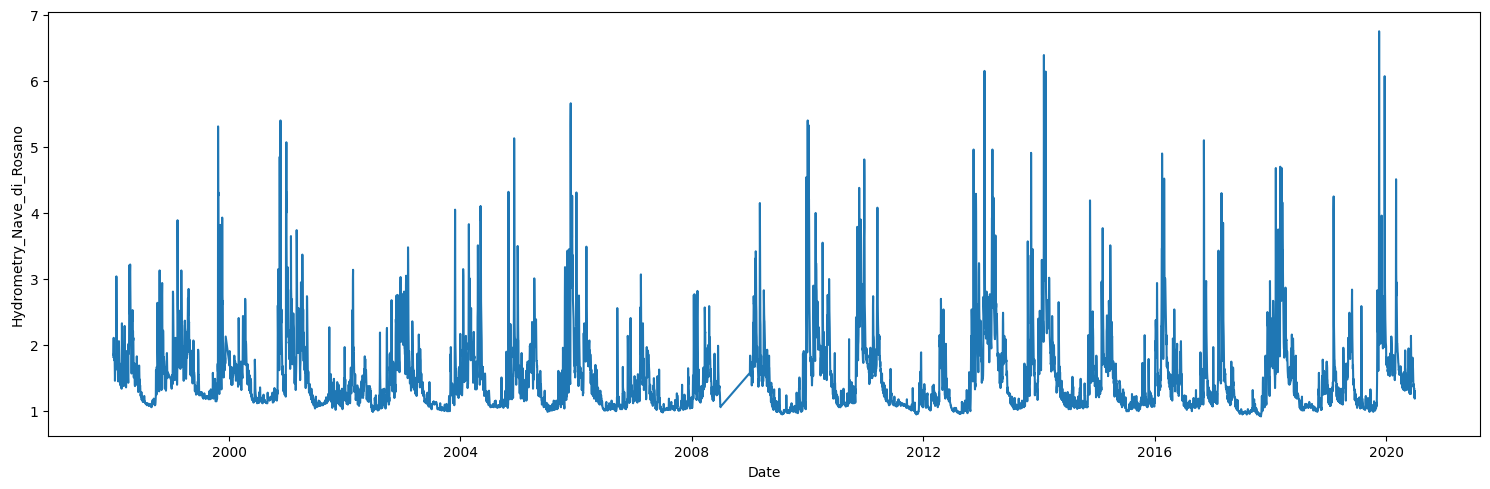

In [14]:
fig, axis = plt.subplots(figsize = (15, 5))
sns.lineplot(data = df)
plt.tight_layout()
plt.show()

In [15]:
df.describe()

count    8217.000000
mean        1.504218
std         0.573638
min         0.920000
25%         1.110000
50%         1.320000
75%         1.690000
max         6.750000
Name: Hydrometry_Nave_di_Rosano, dtype: float64

In [16]:
cantidad_nan = df.isna().sum()
nan_por_mes = df.isna().groupby(df.index.to_period('M')).sum()
nan_por_mes = nan_por_mes[nan_por_mes > 0]
print("Cantidad de NaN:")
print(cantidad_nan)

Cantidad de NaN:
0


## Análisis de la serie temporal

### Análisis de la tendencia

In [ ]:
decomposition = seasonal_decompose(df, model='additive', period=365)
decomposition

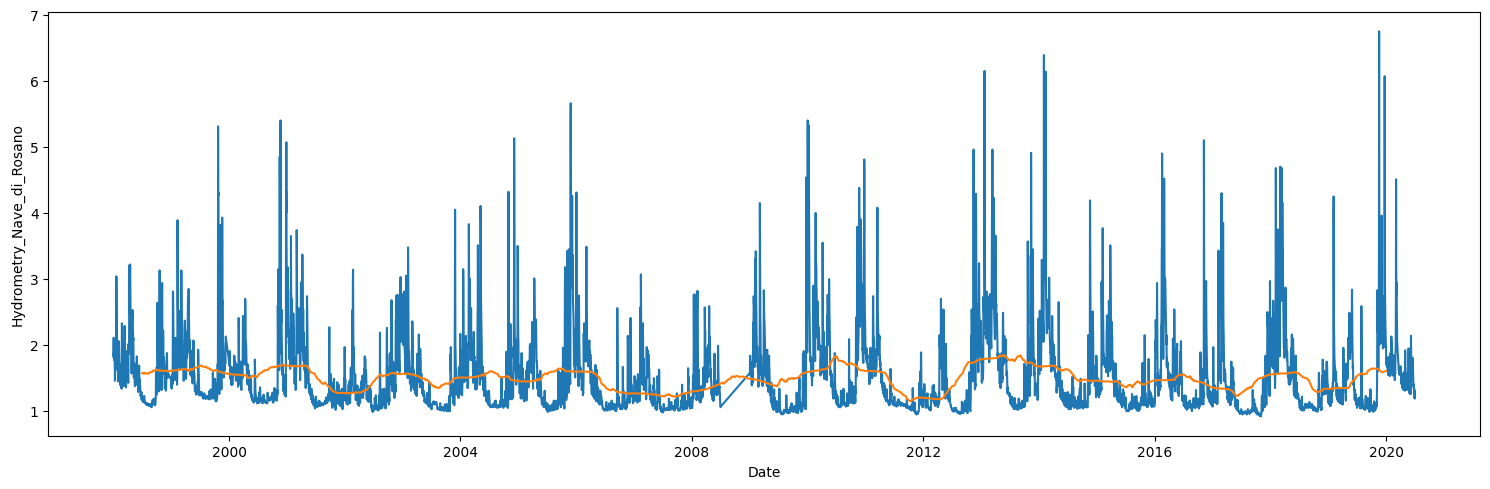

In [18]:
trend = decomposition.trend
fig, axis = plt.subplots(figsize = (15, 5))

sns.lineplot(data = df)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

### Análisis de la estacionalidad

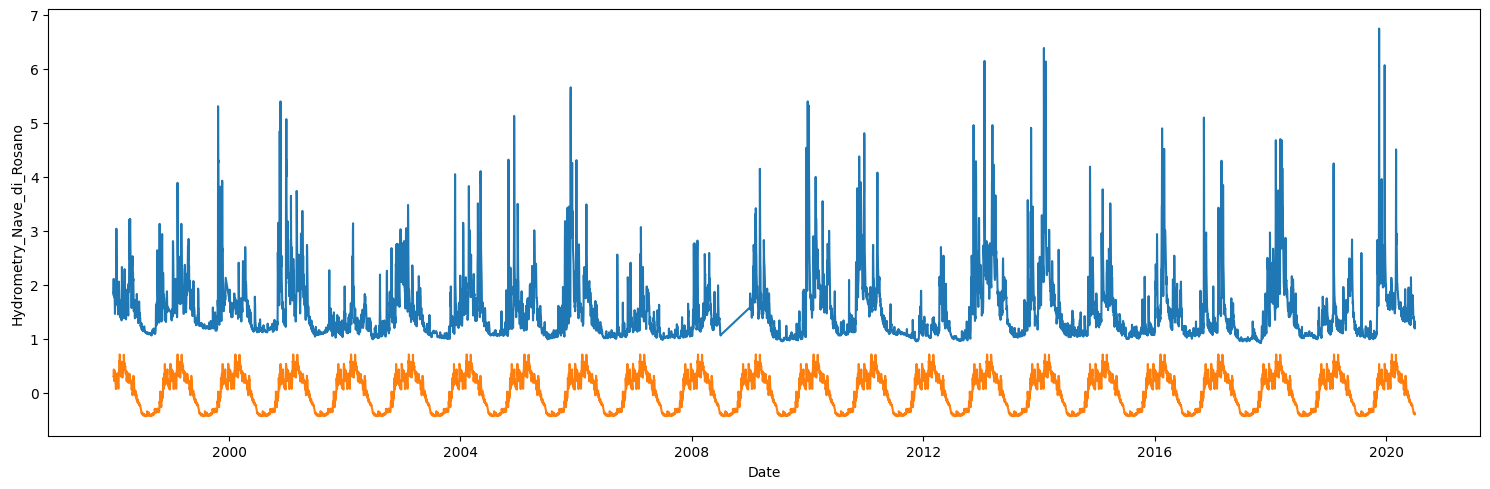

In [19]:
seasonal = decomposition.seasonal
fig, axis = plt.subplots(figsize = (15, 5))

sns.lineplot(data = df)
sns.lineplot(data = seasonal)

plt.tight_layout()
plt.show()

In [ ]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(df)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -8.220565e+00
p-value                        6.446680e-13
#Lags Used                     3.700000e+01
Number of Observations Used    8.179000e+03
Critical Value (1%)           -3.431150e+00
Critical Value (5%)           -2.861893e+00
Critical Value (10%)          -2.566958e+00
dtype: float64

In [21]:
print("La serie es estacionaria porque el p-valor es menor a 0.05. (practicamente 0)")

La serie es estacionaria porque el p-valor es menor a 0.05. (practicamente 0)


### Análisis de la variabilidad

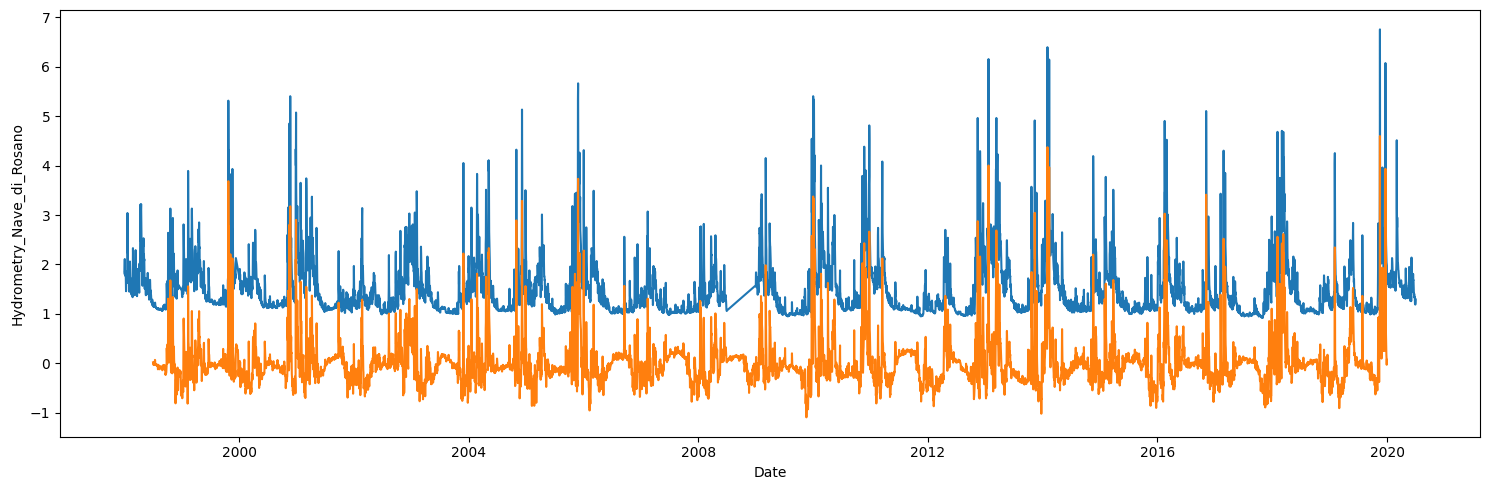

In [22]:
residual = decomposition.resid
fig, axis = plt.subplots(figsize = (15, 5))

sns.lineplot(data = df)
sns.lineplot(data = residual)

plt.tight_layout()
plt.show()

### Análisis de autocorrelación

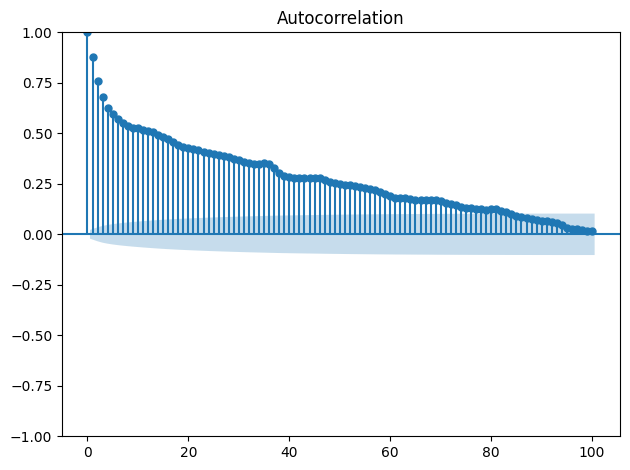

In [ ]:
plot_acf(df, lags=100)

plt.tight_layout()
plt.show()

Según la prueba de Dickey-Fuller, la serie es estacionaria en términos de media y varianza.
Sin embargo, la decadencia lenta en la ACF sugiere que la serie tiene una estructura de dependencia temporal más compleja.

## Entrenamiento del modelo

In [ ]:
from pmdarima import auto_arima
# Ajuste del modelo ARIMA con parámetros específicos para optmizar el tiempo de entrenamiento
model = auto_arima(df, seasonal=True, m=365, trace=True, error_action='ignore', 
                   suppress_warnings=True, max_order=5, max_d=2, max_P=1, max_Q=1, stepwise=True)
model.summary()

/workspaces/Salvador0302-Time-Series-Project/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/Salvador0302-Time-Series-Project/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/Salvador0302-Time-Series-Project/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/Salvador0302-Time-Series-Project/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/Salvador0302-Time-Series-Project/myenv/lib/pytho

Performing stepwise search to minimize aic


In [ ]:
forecast = model.predict(360)
forecast

0


In [ ]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(figsize = (15, 5))

sns.lineplot(data = df, label='Datos Históricos')
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()
plt.show()

In [ ]:
from pickle import dump
with open('../models/model.pkl', 'wb') as file:
    dump(model, file)